In [240]:
#Importing necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn


In [171]:
#Mounting gdrive
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [172]:
#Reading the csv file
data=pd.read_csv("/content/gdrive/MyDrive/Data Science HW design model.csv")
print(data.head(5))
#Analysing the structure of the data
data.shape
#Getting information about the data
data.info()

      A1     A2       A3        A4     A5     A6    A7      A8     A9    A10  \
0  10.69  86.10  8920.16  19912.85  30.42  31.72  1.18  145.41  2.236  1.786   
1  28.50  65.19  6564.00   6716.67  32.50  23.40  2.74   91.11  1.000  1.000   
2  24.87  73.79  4285.47   6463.75  40.50  51.53  2.84   93.90  2.400  1.400   
3  13.64  85.82  6887.56   9244.44  49.56  53.44  0.36  171.45  1.875  2.167   
4   4.50  95.92  8746.50  19987.50  32.75  37.88  0.92  153.25  2.000  1.500   

   ...   A22   A23   A24   A25      A26     A27     A28    A29    A30  default  
0  ...  0.01  0.01  0.01  0.13     0.00    0.00    0.00   0.00   0.00        0  
1  ...  0.06  0.01  0.00  0.09   285.80    0.00   16.44   1.98  42.26        0  
2  ...  0.08  0.02  0.02  0.44   494.62  135.41  127.45  46.00  14.92        0  
3  ...  0.03  0.01  0.00  0.05  1015.19    0.00  210.63  92.58   0.00        0  
4  ...  0.01  0.00  0.00  0.04     0.00  106.41   79.00   0.00   0.00        0  

[5 rows x 31 columns]
<class 'pa

In [173]:
#Checking for missing data
for col in data.columns:
    missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(missing*100)))

A1 - 0%
A2 - 0%
A3 - 0%
A4 - 0%
A5 - 0%
A6 - 0%
A7 - 0%
A8 - 0%
A9 - 0%
A10 - 0%
A11 - 0%
A12 - 0%
A13 - 0%
A14 - 0%
A15 - 0%
A16 - 0%
A17 - 0%
A18 - 0%
A19 - 0%
A20 - 0%
A21 - 0%
A22 - 0%
A23 - 0%
A24 - 0%
A25 - 0%
A26 - 0%
A27 - 0%
A28 - 0%
A29 - 0%
A30 - 0%
default - 0%


In [241]:
#Importing necessary modules for feature engineering/data cleaning
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

In [242]:
#Converting the default variable into a categorical variable instead of integer
data["default"] = data["default"].astype('category')
#data.info()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

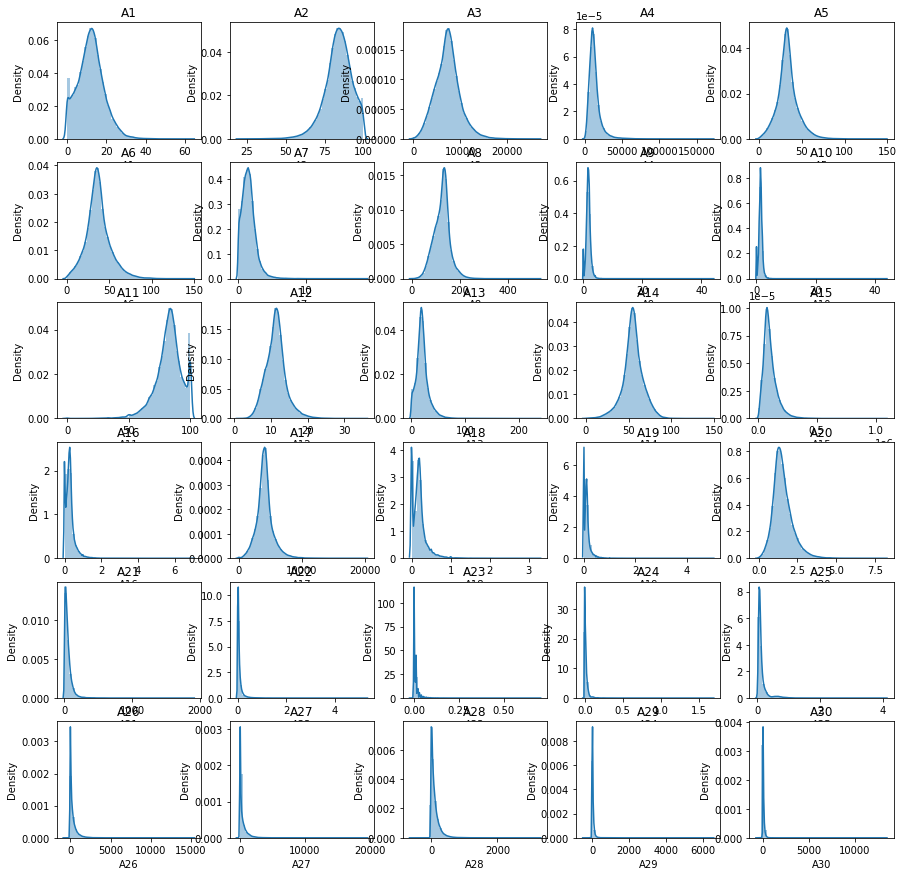

In [176]:
#Plotting subplots of distribution to check skewness of data
fig, axes = plt.subplots(nrows = 6, ncols = 5)    
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, data.columns):
  sns.distplot(data[col], ax = ax)
  ax.set_title(col) 
 


In [177]:
# scaling data
minmax_scaler = MinMaxScaler()
ncols=len(data.columns)
print(ncols)
# transform data

scaled_data=pd.DataFrame(minmax_scaler.fit(data).fit_transform(data),columns=data.columns)
print(scaled_data)

#scaled_data["default"] = scaled_data["default"].astype('category')
scaled_data.info()



31
             A1        A2        A3        A4        A5        A6        A7  \
0      0.170467  0.824606  0.338738  0.116928  0.208356  0.217260  0.063203   
1      0.454473  0.560757  0.249264  0.039440  0.222603  0.160274  0.146760   
2      0.396587  0.669274  0.162738  0.037955  0.277397  0.352945  0.152116   
3      0.217509  0.821073  0.261551  0.054283  0.339452  0.366027  0.019282   
4      0.071759  0.948517  0.332143  0.117366  0.224315  0.259452  0.049277   
...         ...       ...       ...       ...       ...       ...       ...   
93995  0.130442  0.905994  0.163491  0.031826  0.209589  0.235822  0.039100   
93996  0.210812  0.799874  0.289163  0.084913  0.224247  0.238014  0.099089   
93997  0.237761  0.815268  0.175773  0.035643  0.214384  0.270068  0.111944   
93998  0.171743  0.822587  0.324318  0.114227  0.204932  0.210753  0.066417   
93999  0.374262  0.725804  0.139458  0.034063  0.292260  0.301370  0.129620   

             A8        A9       A10  ...       A

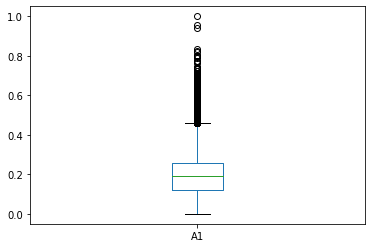

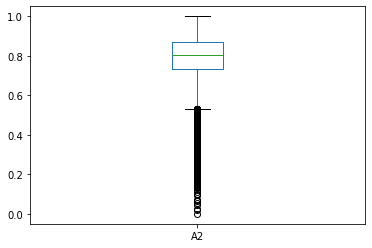

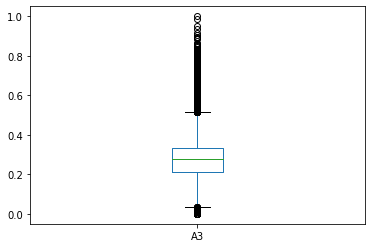

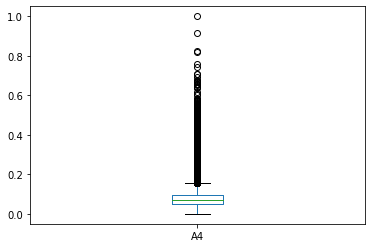

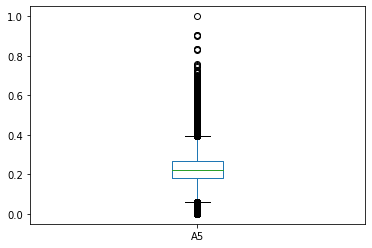

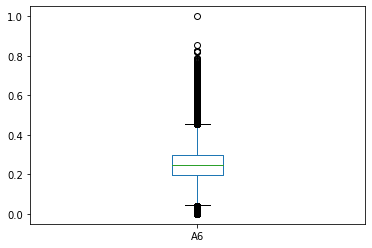

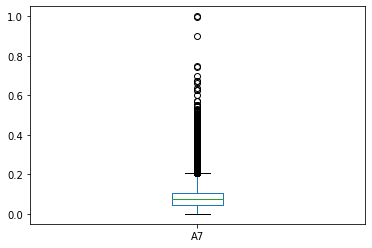

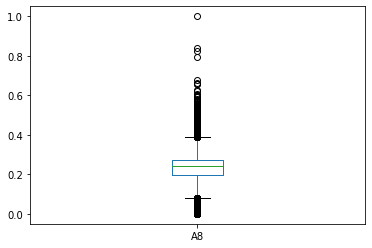

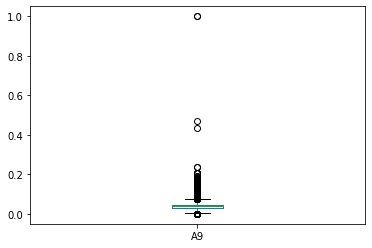

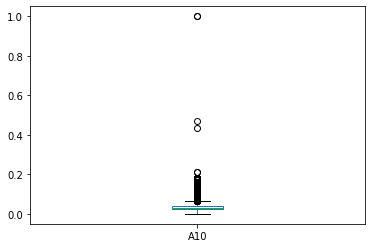

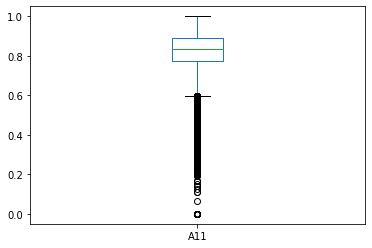

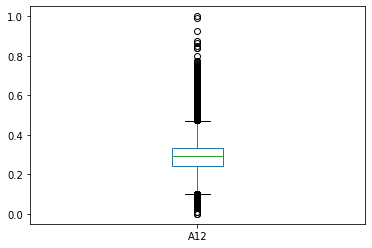

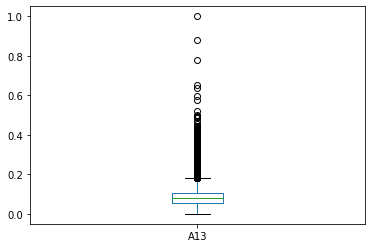

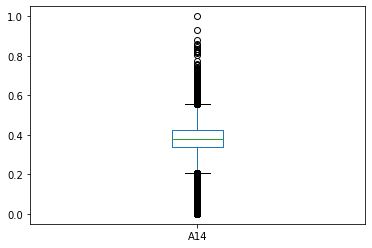

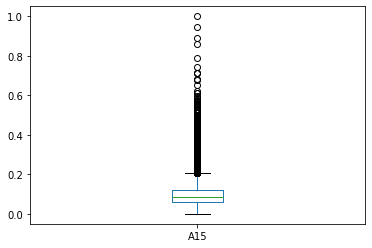

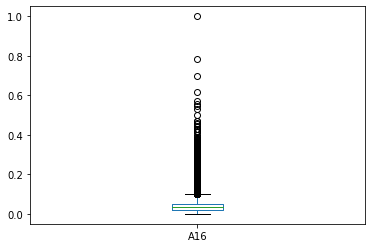

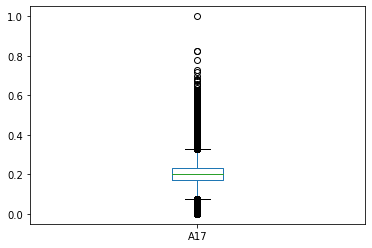

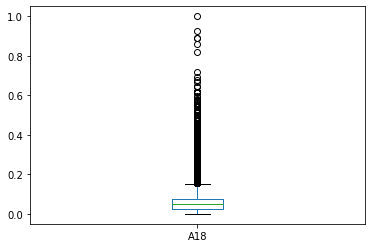

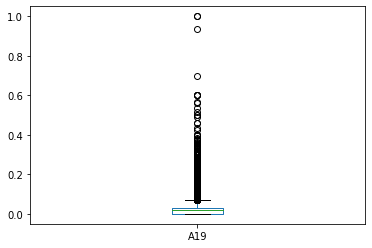

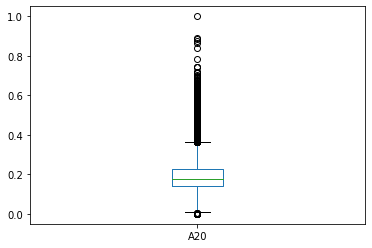

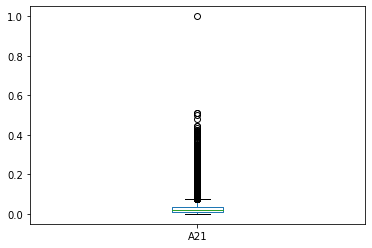

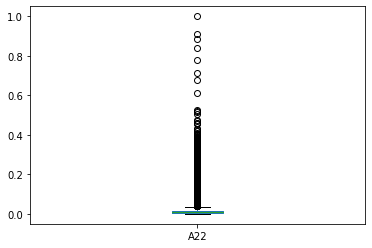

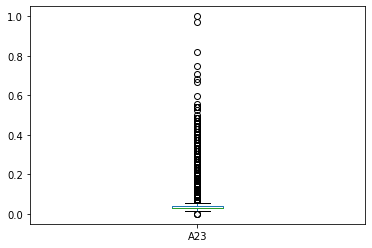

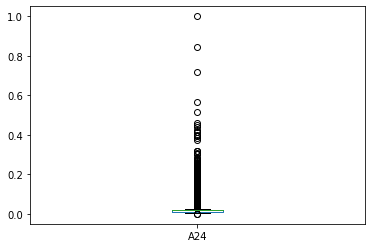

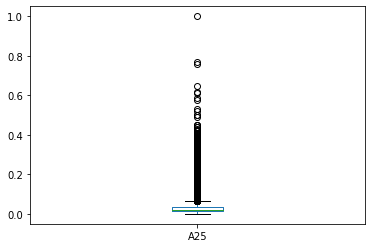

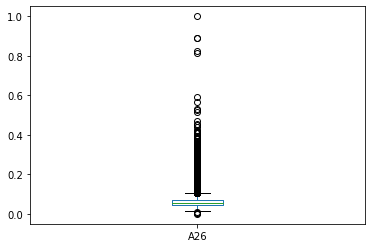

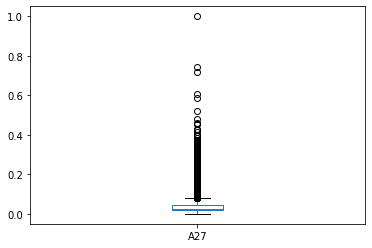

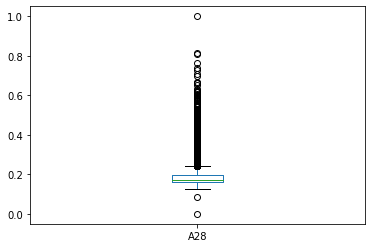

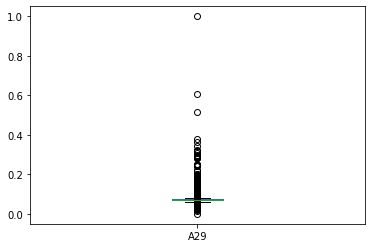

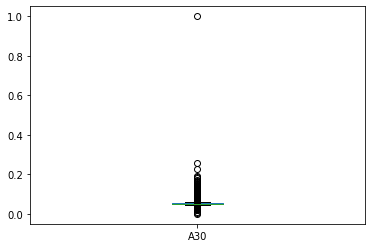

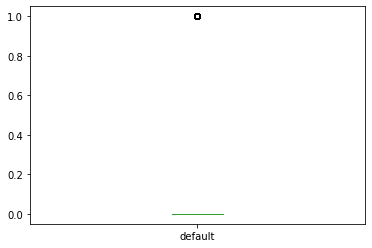

In [179]:
#Checking for outliers:


def plot_boxplot(df,ft):
   df.boxplot(column=[ft])
   plt.grid(False)
   plt.show()

list=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16","A17","A18","A19","A20","A21","A22","A23","A24","A25","A26","A27","A28","A29","A30","default"]
for l in list:
    
    plot_boxplot(scaled_data, l)
    
    plot.show()
    



 


In [243]:
#Removing outliers in data using IQR method
#Structure of old data
print("Old Shape: ", scaled_data.shape)
list=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16","A17","A18","A19","A20","A21","A22","A23","A24","A25","A26","A27","A28","A29","A30"]
Q1 = scaled_data[list].quantile(0.25)
Q3 = scaled_data[list].quantile(0.75)
IQR = Q3 - Q1
#print(Q1)
scaled_data_cleaned = scaled_data[~((scaled_data[list] < (Q1 - 1.5 * IQR)) |(scaled_data[list] > (Q3 + 1.5 * IQR))).any(axis=1)]

#Structure of new data
print("New Shape: ", scaled_data_cleaned.shape)






Old Shape:  (94000, 31)
New Shape:  (37611, 31)


In [181]:
#print(scaled_data_cleaned)

             A1        A2        A3        A4        A5        A6        A7  \
0      0.170467  0.824606  0.338738  0.116928  0.208356  0.217260  0.063203   
4      0.071759  0.948517  0.332143  0.117366  0.224315  0.259452  0.049277   
6      0.134109  0.866877  0.332381  0.088147  0.174247  0.184247  0.065881   
7      0.162494  0.839748  0.373206  0.098715  0.196644  0.210548  0.066952   
9      0.095679  0.600757  0.138271  0.035167  0.310479  0.348151  0.204071   
...         ...       ...       ...       ...       ...       ...       ...   
93987  0.324669  0.579685  0.212612  0.041744  0.320411  0.340205  0.075522   
93988  0.331526  0.756719  0.283211  0.047750  0.220068  0.226027  0.081414   
93990  0.130601  0.924669  0.413091  0.099343  0.134452  0.155959  0.051955   
93993  0.344124  0.688580  0.137093  0.029145  0.301370  0.328288  0.093733   
93994  0.281454  0.689085  0.264378  0.061005  0.258219  0.291438  0.137654   

             A8        A9       A10  ...       A22 

In [182]:

#exploration of data for logistic regression
scaled_data_cleaned['default'].value_counts()

0.0    36747
1.0      864
Name: default, dtype: int64

In [250]:
#Setting x & y from the cleaned data
x=scaled_data_cleaned.iloc[:,0:(ncols-1)] #predictors
y=scaled_data_cleaned.iloc[:, (ncols-1)] #outcome variable

#Building the logistic regression model

#importing necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logisticRegr = LogisticRegression()
import warnings
warnings.filterwarnings("ignore")

#Logistic regression model without hyperparameters
m1 = LogisticRegression()
m1.fit(x,y)
m1.score(x,y)
print(m1.score(x1,y1))

#Hyperparameter and model auto-tuning using regularization 
param_grid = { 'C': [100 , 10 , 1, 0.1 , 0.01]}

best_model = GridSearchCV(logisticRegr , param_grid, cv= 10)
best_model.fit(x,y)
print(best_model.score(x,y))





0.8698260869565217


0.9770279971284996

In [253]:
#Using the models to predict validation dataset values

#reading the dataset
valid_data=pd.read_csv("/content/gdrive/MyDrive/Data Science HW design val.csv")
#Analysing the structure of the data
valid_data.shape
#Getting information about the data
valid_data.info()

#Scaling data to make it similar to training data
minmax_scaler = MinMaxScaler()
ncols2=len(valid_data.columns)
print(ncols2)
#Transform data
scaled_valid_data=pd.DataFrame(minmax_scaler.fit(valid_data).fit_transform(valid_data),columns=data.columns)
print(scaled_valid_data)

#Converting type of default
scaled_valid_data["default"] = scaled_valid_data["default"].astype('category')
scaled_valid_data.info()

#Setting x & y for validation dataset as x1 and y1
x1=scaled_valid_data.iloc[:,0:(ncols2-1)]
y1=scaled_valid_data.iloc[:, (ncols2-1)]

#Using the original model to predict values for validation dataset
y1_model = m1.predict(x1)
print(y1_model)

#Using the model with hyperparameters
best_model.best_params_
predicted_y = best_model.predict(x1)

from sklearn.metrics import accuracy_score
print('Accuracy of simple logistic regression model is', accuracy_score(y1,y1_model), '& accuracy of auto tuned logistic regression model is',accuracy_score(y1,predicted_y) ) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       11500 non-null  float64
 1   A2       11500 non-null  float64
 2   A3       11500 non-null  float64
 3   A4       11500 non-null  float64
 4   A5       11500 non-null  float64
 5   A6       11500 non-null  float64
 6   A7       11500 non-null  float64
 7   A8       11500 non-null  float64
 8   A9       11500 non-null  float64
 9   A10      11500 non-null  float64
 10  A11      11500 non-null  float64
 11  A12      11500 non-null  float64
 12  A13      11500 non-null  float64
 13  A14      11500 non-null  float64
 14  A15      11500 non-null  float64
 15  A16      11500 non-null  float64
 16  A17      11500 non-null  float64
 17  A18      11500 non-null  float64
 18  A19      11500 non-null  float64
 19  A20      11500 non-null  float64
 20  A21      11500 non-null  int64  
 21  A22      115

In [254]:

#Accuracy metric - confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y1, y1_model)
print(cm)

cm2=metrics.confusion_matrix(y1,predicted_y)
print(cm2)



[[10000     0]
 [ 1497     3]]
[[9998    2]
 [1492    8]]


In [256]:
#AUC for logistic regression model

#use model to predict probability that given y value is 1
y_pred_probability =m1.predict_proba(x1)[::,1]
y_pred_probability2=best_model.predict_proba(x1)[::,1]

#calculate AUC of model
auc_log = metrics.roc_auc_score(y1, y_pred_probability)
auc_log2=metrics.roc_auc_score(y1,y_pred_probability2)

#print AUC score
print(auc_log)
print(auc_log2)


0.8139771333333333
0.7738683333333334


In [257]:
#Model 2
#Classification and decision trees

#importing necessary packages
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

#Data to be used(#no scaling required)
#removing outliers without scaling
print("Old Shape: ", data)
list=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16","A17","A18","A19","A20","A21","A22","A23","A24","A25","A26","A27","A28","A29","A30"]
Q1 = data[list].quantile(0.25)
Q3 = data[list].quantile(0.75)
IQR = Q3 - Q1
#print(Q1)
data_cleaned = data[~((data[list] < (Q1 - 1.5 * IQR)) |(data[list] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("New Shape: ", data_cleaned.shape)

#Recursive Feature elimination model
x2 = data_cleaned.loc[:, data_cleaned.columns != 'default']
y2= data_cleaned.loc[:, data_cleaned.columns == 'default']
model = DecisionTreeClassifier(random_state=42)
rfe = RFE(model)
rfe = rfe.fit(x2, y2)
print(rfe.support_)
print(rfe.ranking_)

#Storing RFE output in a dataframe
data_X2 = pd.DataFrame({
 'Feature': x.columns,
 'Importance': rfe.ranking_},)
data_X2.sort_values(by=['Importance'])

#Getting important features
cols=[]
for i in range (0, len(data_X2['Importance'])):
 if data_X2['Importance'][i] == 1:
  cols.append(data_X2['Feature'][i])
print(cols)
print(len(cols))

#Revised x2 and y2
x2=x2[cols]
print(x2)



Old Shape:            A1     A2       A3        A4     A5     A6    A7      A8     A9  \
0      10.69  86.10  8920.16  19912.85  30.42  31.72  1.18  145.41  2.236   
1      28.50  65.19  6564.00   6716.67  32.50  23.40  2.74   91.11  1.000   
2      24.87  73.79  4285.47   6463.75  40.50  51.53  2.84   93.90  2.400   
3      13.64  85.82  6887.56   9244.44  49.56  53.44  0.36  171.45  1.875   
4       4.50  95.92  8746.50  19987.50  32.75  37.88  0.92  153.25  2.000   
...      ...    ...      ...       ...    ...    ...   ...     ...    ...   
93995   8.18  92.55  4305.29   5420.00  30.60  34.43  0.73   76.67  0.000   
93996  13.22  84.14  7614.67  14460.69  32.74  34.75  1.85  117.22  2.287   
93997  14.91  85.36  4628.71   6070.00  31.30  39.43  2.09  135.70  3.000   
93998  10.77  85.94  8540.43  19452.79  29.92  30.77  1.24  147.39  2.013   
93999  23.47  78.27  3672.42   5800.87  42.67  44.00  2.42   78.69  0.833   

         A10  ...   A22   A23   A24   A25      A26      A27    

In [260]:
#model fitting for decision tree
model.fit(x2,y2)

#Using the model on validation data to predict outcomes
x_v=valid_data.iloc[:,0:(ncols2-1)]
x_v=x_v[cols]
y_v=valid_data.iloc[:, (ncols2-1)]

y_pred = model.predict(x_v)

#Accuracy metrics 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_v, y_pred)
print(confusion_matrix)

from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_v, y_pred)
print(acc_score)

[[9118  882]
 [1102  398]]
0.8274782608695652


In [212]:
#AUC for decision tree

#use model to predict probability that given y value is 1
y_pred_proba = model.predict_proba(x_v)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_v, y_pred_proba)

#print AUC score
print(auc)

0.5885666666666667


In [237]:
#Sending outputs to .csv files
#predicted_y.to_csv("/content/sample_data/abc.csv")

#type(predicted_y)

a = pd.DataFrame(predicted_y)
b=pd.DataFrame(y_pred)

a.head()
a.to_csv("/content/sample_data/results1.csv")

b.head()
b.to_csv("/content/sample_data/results2.csv")